In [1]:
import requests
import pandas as pd

## Pobieranie wyników turnieju- część 1

In [2]:
def scores_pipeline(url):
    pd.read_html(requests.get(url).content)[-1].to_csv("mydata.csv")
    df=pd.read_csv('mydata.csv')
    df=df.drop(['Unnamed: 0','+/-','pkl', 'pdf'],axis=1)
    return df

In [3]:
def regex_trans_scores(df):
    import re
    pierwszy=[]
    drugi=[]
    for i in range(len(df)):
        pierwszy.append(re.findall('[A-ZŻŹĆĄŚĘŁÓŃ][^A-ZŻŹĆĄŚĘŁÓŃ]*', df.nazwiska[i])[0]+re.findall('[A-ZŻŹĆĄŚĘŁÓŃ][^A-ZŻŹĆĄŚĘŁÓŃ]*', df.nazwiska[i])[1])
        drugi.append(re.findall('[A-ZŻŹĆĄŚĘŁÓŃ][^A-ZŻŹĆĄŚĘŁÓŃ]*', df.nazwiska[i])[2]+re.findall('[A-ZŻŹĆĄŚĘŁÓŃ][^A-ZŻŹĆĄŚĘŁÓŃ]*', df.nazwiska[i])[3])
    df['nazwisko_1']=pierwszy
    df['nazwisko_2']=drugi
    df=df.drop('nazwiska',axis=1)


    wk1=[]
    wk2=[]
    for i in range(len(df)):
        wk1.append(re.findall("\d+\.\d", df.wk[i])[0])
        wk2.append(re.findall("\d+\.\d", df.wk[i])[1])
    df['wk_1']=wk1
    df['wk_2']=wk2
    df=df.drop(['wk','ośrodek','okręg'],axis=1)
    return df

## Pobieranie wyników poszczególnych rozdań

In [110]:
def get_hist(n,vector):
    pd.read_html(requests.get(f"https://r.bridgespider.com/{vector[0]}/prot/{1}/").content)[-1].to_csv("mydat.csv")
    tmp=pd.read_csv('mydat.csv')
    tmp['nr_rozdania']=1
    tmp['nr_turnieju']=vector[0]
    for j in range (len(vector)):
        for i in range(1,n):
            pd.read_html(requests.get(f"https://r.bridgespider.com/{vector[j]}/prot/{i+1}/").content)[-1].to_csv("mydat.csv")
            zz=pd.read_csv('mydat.csv')
            zz['nr_rozdania']=i+1
            zz['nr_turnieju']=vector[j]
            tmp=pd.concat([tmp,zz])
    return tmp

In [104]:
tmp=pd.read_html(requests.get(f"https://r.bridgespider.com/{25890}/prot/{1}/").content)[-1].to_csv("mydat.csv")

In [107]:
tmp=pd.read_csv('mydat.csv')

In [109]:
pd.concat([tmp,tmp])

,Unnamed: 0,ośrodek,runda,NS,EW,kontrakt,rozg.,wist,lew,zapis,% NS,% EW,Unnamed: 11
0,0,DS/136,5,8,11,2,E,8,+1,-150,67.46,32.54,NaN
1,1,DS/136,3,5,9,1,W,5,+3,-180,57.74,42.26,NaN
2,2,DS/136,6,10,7,2,E,3,+2,-180,57.74,42.26,NaN
3,3,DS/136,4,3,2,3,E,3,=,-400,38.89,61.11,NaN
4,4,DS/136,9,4,6,3,E,8,=,-400,38.89,61.11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,248,ZP/452,11,530,532,3,E,3,-2,100,98.61,1.39,NaN
249,249,ZP/452,12,525,528,3,E,6,=,-400,38.89,61.11,NaN
250,250,ZP/452,13,527,523,3,W,5,=,-400,38.89,61.11,NaN
251,251,ZP/452,14,529,522,3,W,5,+1,-430,13.29,86.71,NaN


In [5]:
def pipeline(df2):
    df2=df2.drop(['Unnamed: 0','ośrodek','runda','wist','Unnamed: 11','lew','kontrakt'],axis=1)
    df2['rozg.']=df2['rozg.'].replace(['E','W'],'EW')
    df2['rozg.']=df2['rozg.'].replace(['N','S'],'NS')
    df2['zapis_NS']=df2['zapis']
    df2['zapis_EW']=df2['zapis']*(-1)
    df2=df2.drop('zapis',axis=1)
    return df2

In [72]:
def pipeline2(df_x):
    tmp1=df_x.copy()
    tmp2=df_x.copy()
    tmp1=tmp1.drop(['EW','% EW','zapis_EW'],axis=1)
    tmp1['linia']='NS'
    tmp2=tmp2.drop(['NS','% NS','zapis_NS'],axis=1)
    tmp2['linia']='EW'
    tmp1.columns=['id','rozg','wynik','nr_rozdania','nr_turnieju','zapis','linia']
    tmp2.columns=['id','rozg','wynik','nr_rozdania','nr_turnieju','zapis','linia']
    tmp=pd.concat([tmp1,tmp2])
    return tmp

In [116]:
def refactor(history):
    history=pipeline(history)
    history=pipeline2(history)
    return history

## Main

In [8]:
scores=scores_pipeline("https://r.bridgespider.com/25890/")
scores=regex_trans_scores(scores)
scores['nr_turnieju']=25890
scores

,m-ce,nr,%,nazwisko_1,nazwisko_2,wk_1,wk_2,nr_turnieju
0,1,99,66.18,Jerzy Pala,Jan Styczyński,5.0,5.0,25890
1,2,140,65.97,Sebastian Rawlik,Damian Mazurak,5.0,5.0,25890
2,3,10,64.60,Janusz Czerniawski,Zbigniew Buciuto,5.0,3.0,25890
3,4,527,64.47,Ryszard Smejda,Damian Wroński,7.0,11.0,25890
4,5,247,64.31,Wojciech Słysz,Marek Melsztyński,1.5,2.0,25890
...,...,...,...,...,...,...,...,...
517,518,271,33.67,Jerzy Słomski,Jolanta Wiśniewska,2.5,4.0,25890
518,519,356,32.97,Leszek Zieliński,Janusz Bakalarz,4.0,0.5,25890
519,520,361,31.28,Natalia Fręchowicz,Jan Luber,0.0,0.0,25890
520,521,109,31.06,Wincenty Tęgowski,Paweł Jankiewicz,0.0,0.0,25890


In [9]:
history=get_hist(30)
history=refactor(history)
history[0]

,id,rozg,wynik,zapis,linia
0,8,EW,67.46,-150,NS
1,5,EW,57.74,-180,NS
2,10,EW,57.74,-180,NS
3,3,EW,38.89,-400,NS
4,4,EW,38.89,-400,NS
...,...,...,...,...,...
248,532,EW,1.39,-100,EW
249,528,EW,61.11,400,EW
250,523,EW,61.11,400,EW
251,522,EW,86.71,430,EW


## Część 2

In [10]:
for i in range(30):
    history[i]['numer_rozdania']=i+1    

In [11]:
tmp=pd.concat([history[0],history[1]])
for i in range(2,len(history)):
    tmp=pd.concat([tmp,history[i]])
tmp    

,id,rozg,wynik,zapis,linia,numer_rozdania
0,8,EW,67.46,-150.0,NS,1
1,5,EW,57.74,-180.0,NS,1
2,10,EW,57.74,-180.0,NS,1
3,3,EW,38.89,-400.0,NS,1
4,4,EW,38.89,-400.0,NS,1
...,...,...,...,...,...,...
136,531,EW,78.84,170.0,EW,30
137,527,EW,78.84,170.0,EW,30
138,522,EW,78.84,170.0,EW,30
139,521,EW,56.41,140.0,EW,30


In [12]:
tmp1=tmp[tmp['rozg']==tmp['linia']]
tmp2=tmp[tmp['rozg']!=tmp['linia']]
tmp1['czy_rozgrywa']=True
tmp2['czy_rozgrywa']=False
tmp=pd.concat([tmp1,tmp2])

C:\Users\p.okonek\AppData\Local\Temp\ipykernel_15768\3798423981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1['czy_rozgrywa']=True
C:\Users\p.okonek\AppData\Local\Temp\ipykernel_15768\3798423981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp2['czy_rozgrywa']=False


In [13]:
tmp[tmp['id']==99].reset_index()

,index,id,rozg,wynik,zapis,linia,numer_rozdania,czy_rozgrywa
0,47,99,EW,61.11,400.0,EW,1,True
1,47,99,EW,89.00,1010.0,EW,2,True
2,51,99,NS,69.48,650.0,NS,4,True
3,51,99,NS,58.53,140.0,NS,5,True
4,51,99,NS,82.74,460.0,NS,6,True
5,51,99,EW,98.40,590.0,EW,8,True
6,48,99,NS,54.96,140.0,NS,11,True
7,52,99,EW,96.63,170.0,EW,16,True
8,52,99,EW,88.25,-100.0,EW,18,True
9,50,99,NS,24.70,180.0,NS,21,True


In [14]:
tab=[25845,25809,25773,25737,25692,24384,24339,24303,24267,24222,24186,24150,22079 ,22043 ,21800,21764,21728,17693,17666]

In [15]:
url="https://r.bridgespider.com/"

In [16]:
url+str(tab[2])+'/'

'https://r.bridgespider.com/25773/'

In [17]:
scores

,m-ce,nr,%,nazwisko_1,nazwisko_2,wk_1,wk_2,nr_turnieju
0,1,99,66.18,Jerzy Pala,Jan Styczyński,5.0,5.0,25890
1,2,140,65.97,Sebastian Rawlik,Damian Mazurak,5.0,5.0,25890
2,3,10,64.60,Janusz Czerniawski,Zbigniew Buciuto,5.0,3.0,25890
3,4,527,64.47,Ryszard Smejda,Damian Wroński,7.0,11.0,25890
4,5,247,64.31,Wojciech Słysz,Marek Melsztyński,1.5,2.0,25890
...,...,...,...,...,...,...,...,...
517,518,271,33.67,Jerzy Słomski,Jolanta Wiśniewska,2.5,4.0,25890
518,519,356,32.97,Leszek Zieliński,Janusz Bakalarz,4.0,0.5,25890
519,520,361,31.28,Natalia Fręchowicz,Jan Luber,0.0,0.0,25890
520,521,109,31.06,Wincenty Tęgowski,Paweł Jankiewicz,0.0,0.0,25890


-------------------------------

In [18]:
for i in tab:
    url="https://r.bridgespider.com/"
    url=url+str(i)+'/'
    tmp=scores_pipeline(url)
    tmp=regex_trans_scores(tmp)
    tmp['nr_turnieju']=i
    scores=pd.concat([tmp,scores])
    
scores

,m-ce,nr,%,nazwisko_1,nazwisko_2,wk_1,wk_2,nr_turnieju
0,1,660,67.09,Grażyna Busse,Piotr Busse,15.0,19.0,17666
1,2,597,65.96,Jerzy Ratkowski,Jerzy Sukow,5.0,12.0,17666
2,3,374,65.35,Dariusz Krakowiak,Jacek Lech,3.0,2.0,17666
3,4,720,64.69,Władysław Tomasiak,Wojciech Bondarewicz,13.0,4.0,17666
4,5,33,64.43,Jarosław Kowalik,Roman Wyszowski,5.0,5.0,17666
...,...,...,...,...,...,...,...,...
517,518,271,33.67,Jerzy Słomski,Jolanta Wiśniewska,2.5,4.0,25890
518,519,356,32.97,Leszek Zieliński,Janusz Bakalarz,4.0,0.5,25890
519,520,361,31.28,Natalia Fręchowicz,Jan Luber,0.0,0.0,25890
520,521,109,31.06,Wincenty Tęgowski,Paweł Jankiewicz,0.0,0.0,25890


In [19]:
scores['unique_id'] = scores.groupby(['nazwisko_1', 'nazwisko_2']).ngroup()
scores

,m-ce,nr,%,nazwisko_1,nazwisko_2,wk_1,wk_2,nr_turnieju,unique_id
0,1,660,67.09,Grażyna Busse,Piotr Busse,15.0,19.0,17666,1199
1,2,597,65.96,Jerzy Ratkowski,Jerzy Sukow,5.0,12.0,17666,2029
2,3,374,65.35,Dariusz Krakowiak,Jacek Lech,3.0,2.0,17666,883
3,4,720,64.69,Władysław Tomasiak,Wojciech Bondarewicz,13.0,4.0,17666,4565
4,5,33,64.43,Jarosław Kowalik,Roman Wyszowski,5.0,5.0,17666,1865
...,...,...,...,...,...,...,...,...,...
517,518,271,33.67,Jerzy Słomski,Jolanta Wiśniewska,2.5,4.0,25890,2078
518,519,356,32.97,Leszek Zieliński,Janusz Bakalarz,4.0,0.5,25890,2591
519,520,361,31.28,Natalia Fręchowicz,Jan Luber,0.0,0.0,25890,3234
520,521,109,31.06,Wincenty Tęgowski,Paweł Jankiewicz,0.0,0.0,25890,4430


In [20]:
vector=scores["unique_id"].value_counts().index.tolist()[:10]

In [21]:
top10=scores.loc[scores["unique_id"].isin(vector)]

In [22]:
top10

,m-ce,nr,%,nazwisko_1,nazwisko_2,wk_1,wk_2,nr_turnieju,unique_id
55,56,700,59.53,Rafał Junik,Jolanta Ziętara,7.0,5.0,17666,3473
148,149,592,55.67,Wiesław Pietrzak,Zenon Wawer,5.0,5.0,17666,4382
237,238,207,52.96,Krzysztof Borowik,Henryk Choiński,0.0,3.0,17666,2359
250,251,202,52.59,Franciszek Bułyszko,Zbigniew Józefiak,4.0,4.0,17666,1158
318,319,13,51.25,Andrzej Augustyniak,Henryk Gayny,5.0,2.0,17666,178
...,...,...,...,...,...,...,...,...,...
193,194,388,52.54,Wiesław Pietrzak,Zenon Wawer,5.0,5.0,25890,4382
285,286,198,49.09,Krzysztof Borowik,Henryk Choiński,1.5,3.0,25890,2359
405,406,200,44.91,Sławomir Rutecki,Tadeusz Birecki,7.0,5.0,25890,3963
441,442,199,43.00,Franciszek Bułyszko,Zbigniew Józefiak,4.0,5.0,25890,1158


## Zawodnicy z Cezara

In [23]:
url="https://msc.com.pl/cezar/?p=51&rok=0&page=1"

In [24]:
pd.read_html(requests.get(url).content)[-1].to_csv("mydata.csv")
df=pd.read_csv('mydata.csv')

In [25]:
tables = pd.read_html(url,match="klub / drużyna")
df=tables[2]

In [26]:
for i in range(65,337):
    url=f"https://msc.com.pl/cezar/?p=51&rok=0&page={i}"
    tables = pd.read_html(url,match="klub / drużyna")
    df=pd.concat([df,tables[2]])

In [27]:
df.to_csv('Lista_Zawodnikow.csv')

In [28]:
scores

,m-ce,nr,%,nazwisko_1,nazwisko_2,wk_1,wk_2,nr_turnieju,unique_id
0,1,660,67.09,Grażyna Busse,Piotr Busse,15.0,19.0,17666,1199
1,2,597,65.96,Jerzy Ratkowski,Jerzy Sukow,5.0,12.0,17666,2029
2,3,374,65.35,Dariusz Krakowiak,Jacek Lech,3.0,2.0,17666,883
3,4,720,64.69,Władysław Tomasiak,Wojciech Bondarewicz,13.0,4.0,17666,4565
4,5,33,64.43,Jarosław Kowalik,Roman Wyszowski,5.0,5.0,17666,1865
...,...,...,...,...,...,...,...,...,...
517,518,271,33.67,Jerzy Słomski,Jolanta Wiśniewska,2.5,4.0,25890,2078
518,519,356,32.97,Leszek Zieliński,Janusz Bakalarz,4.0,0.5,25890,2591
519,520,361,31.28,Natalia Fręchowicz,Jan Luber,0.0,0.0,25890,3234
520,521,109,31.06,Wincenty Tęgowski,Paweł Jankiewicz,0.0,0.0,25890,4430


In [29]:
scores.columns

Index(['m-ce', 'nr', '%', 'nazwisko_1', 'nazwisko_2', 'wk_1', 'wk_2',
       'nr_turnieju', 'unique_id'],
      dtype='object')

In [30]:
scores_1=scores[['m-ce', 'nr', '%', 'nazwisko_1','wk_1','nr_turnieju']]
scores_2=scores[['m-ce', 'nr', '%', 'nazwisko_2','wk_2','nr_turnieju']]

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
scores_1['nazwisko']=scores_1['nazwisko_1']
scores_2['nazwisko']=scores_2['nazwisko_2']
scores_1['wk']=scores_1['wk_1']
scores_2['wk']=scores_2['wk_2']
scores_1=scores_1.drop(['nazwisko_1','wk_1'],axis=1)
scores_2=scores_2.drop(['nazwisko_2','wk_2'],axis=1)

In [33]:
scores_new=pd.concat([scores_1,scores_2])

In [34]:
df.rename(columns = {2: 'name'}, inplace = True)

In [35]:
df.rename(columns = {1: 'PID'}, inplace = True)

In [36]:
df

,0,PID,name,3,4,5,6,7,8
0,lokata,PID,imię i nazwisko,WZBS,WK,TK,PKL,liga,klub / drużyna
1,1.,06706,Apolinary Kowalski,WM,24,AS,187 649,E,VITAS ESBS Elblag
2,2.,08513,Piotr Gawryś,DS,24,AS,149 944,E,BRIDGESCANNER KS AZS Wratislavia I WR
3,3.,06658,Jacek Kalita,SW,24,AS,146 928,E,SPS CONSTRUCTION Kielce
4,4.,01221,Cezary Balicki,DS,24,AS,143 379,-,NaN
...,...,...,...,...,...,...,...,...,...
46,NaN,20956,Maciej Wisz,PK,0,D,1,-,Singleton Podkarpacki
47,NaN,17464,Małgorzata Wiśniewska,DS,0,D,1,-,NaN
48,NaN,20096,Adrian Witkowski,KP,0,D,1,-,NaN
49,NaN,21716,Jakub Witowski,PK,0,D,1,-,Singleton Podkarpacki


In [121]:
last_scores=scores_new.merge(df[['PID','name']],left_on='nazwisko',right_on='name')

In [122]:
last_scores=last_scores.drop(['name'],axis=1)

In [123]:
last_scores

,m-ce,nr,%,nr_turnieju,nazwisko,wk,PID
0,3,374,65.35,17666,Dariusz Krakowiak,3.0,17854
1,33,384,61.43,17693,Dariusz Krakowiak,3.0,17854
2,183,366,55.17,21728,Dariusz Krakowiak,3.0,17854
3,49,384,60.59,21764,Dariusz Krakowiak,3.0,17854
4,72,52,46.54,24150,Dariusz Krakowiak,3.0,17854
...,...,...,...,...,...,...,...
11754,232,176,51.10,25890,Andrzej Piętak,3.0,08323
11755,303,455,48.75,25890,Andrzej Grześko,2.0,19403
11756,321,20,48.22,25890,Tymoteusz Zaborowski,1.5,17787
11757,467,411,40.96,25890,Wiesław Kulikowski,1.5,15109


In [134]:
zz=last_scores[last_scores[['nr_turnieju','nazwisko']].duplicated(keep=False)]

In [135]:
last_scores=pd.concat([last_scores,zz]).drop_duplicates(keep=False)

In [44]:
tmp

,m-ce,nr,%,nazwisko_1,nazwisko_2,wk_1,wk_2,nr_turnieju
0,1,660,67.09,Grażyna Busse,Piotr Busse,15.0,19.0,17666
1,2,597,65.96,Jerzy Ratkowski,Jerzy Sukow,5.0,12.0,17666
2,3,374,65.35,Dariusz Krakowiak,Jacek Lech,3.0,2.0,17666
3,4,720,64.69,Władysław Tomasiak,Wojciech Bondarewicz,13.0,4.0,17666
4,5,33,64.43,Jarosław Kowalik,Roman Wyszowski,5.0,5.0,17666
...,...,...,...,...,...,...,...,...
747,748,459,34.16,Adam Maryniak,Bożena Materna,0.0,0.0,17666
748,749,66,33.28,Jerzy Stypiński,Tadeusz Janeczek,3.0,3.0,17666
749,750,431,33.07,Ireneusz Hebdowski,Jan Kurianowicz,0.0,0.0,17666
750,751,5,31.37,Zbigniew Leśniewski,Mikołaj Piotrowski,1.5,0.0,17666


In [137]:
last_scores

,m-ce,nr,%,nr_turnieju,nazwisko,wk,PID
0,3,374,65.35,17666,Dariusz Krakowiak,3.0,17854
1,33,384,61.43,17693,Dariusz Krakowiak,3.0,17854
2,183,366,55.17,21728,Dariusz Krakowiak,3.0,17854
3,49,384,60.59,21764,Dariusz Krakowiak,3.0,17854
4,72,52,46.54,24150,Dariusz Krakowiak,3.0,17854
...,...,...,...,...,...,...,...
11754,232,176,51.10,25890,Andrzej Piętak,3.0,08323
11755,303,455,48.75,25890,Andrzej Grześko,2.0,19403
11756,321,20,48.22,25890,Tymoteusz Zaborowski,1.5,17787
11757,467,411,40.96,25890,Wiesław Kulikowski,1.5,15109


In [136]:
last_scores['nazwisko'].value_counts()

Dariusz Krakowiak      20
Zbigniew Bobak         20
Przemysław Wojtczak    20
Henryk Choiński        19
Krzysztof Borowik      19
                       ..
Antoni Kierepka         1
Marek Księżopolski      1
Szymon Mazur            1
Janusz Kurkowski        1
Matylda Brzyzka         1
Name: nazwisko, Length: 2003, dtype: int64

## Pobieranie wynikow konkretnego gracza

In [47]:
vector=last_scores[last_scores['nazwisko']=='Dariusz Krakowiak']['nr_turnieju']

In [54]:
vector

0     17666
1     17693
2     21728
3     21764
4     24150
5     24267
6     24303
7     25845
8     21800
9     22043
10    22079
11    24186
12    24222
13    24339
14    24384
15    25692
16    25737
17    25773
18    25809
19    25890
Name: nr_turnieju, dtype: int64

In [57]:
history[29]

,id,rozg,wynik,zapis,linia,numer_rozdania
0,9,NS,90.94,110,NS,30
1,3,EW,43.59,-140,NS,30
2,2,EW,21.16,-170,NS,30
3,4,EW,1.94,-420,NS,30
4,7,EW,1.94,-420,NS,30
...,...,...,...,...,...,...
136,531,EW,78.84,170,EW,30
137,527,EW,78.84,170,EW,30
138,522,EW,78.84,170,EW,30
139,521,EW,56.41,140,EW,30


In [58]:
proba=[25890,25809]

In [62]:
history

[     Unnamed: 0 ośrodek  runda   NS   EW kontrakt rozg. wist lew  zapis  \
 0             0  DS/136      1    3    7        3     N    2   =    140   
 1             1  DS/136      7    5    6        3     N    9  -1    -50   
 2             2  DS/136      8   10    8        3     S    3  -3   -150   
 3             3  DS/136      9    1    4      3 x     N    9  -2   -300   
 4             4  DS/136      6    2    9        3     W    J   =   -400   
 ..          ...     ...    ...  ...  ...      ...   ...  ...  ..    ...   
 267         267  ZP/433      5  586  593        2     S    4  -1    -50   
 268         268  ZP/433      6  592  590        3     W    4  +1   -430   
 269         269  ZP/433      7  594  587        3     W    9  -1     50   
 270         270  ZP/433      8  585  591        3     E    J  +2   -150   
 271         271  ZP/433      9  584  595        2     N    2   =    110   
 
       % NS   % EW  Unnamed: 11  
 0    94.65   5.35          NaN  
 1    52.40  47.60

In [111]:
history=get_hist(30,proba)   

In [115]:
history=pipeline(history)
history=pipeline2(history)
history

,id,rozg,wynik,nr_rozdania,nr_turnieju,zapis,linia
0,8,EW,67.46,1,25890,-150.0,NS
1,5,EW,57.74,1,25890,-180.0,NS
2,10,EW,57.74,1,25890,-180.0,NS
3,3,EW,38.89,1,25890,-400.0,NS
4,4,EW,38.89,1,25890,-400.0,NS
...,...,...,...,...,...,...,...
197,589,NS,44.76,30,25809,-420.0,EW
198,586,NS,70.47,30,25809,-170.0,EW
199,590,NS,16.79,30,25809,-450.0,EW
200,595,NS,52.50,30,25809,-400.0,EW


In [113]:
len(history)

15003

In [96]:
tmp=pd.DataFrame(history[0])

In [97]:
tmp

,Unnamed: 0,ośrodek,runda,NS,EW,kontrakt,rozg.,wist,lew,zapis,% NS,% EW,Unnamed: 11,nr_rozdania,nr_turnieju
0,0,DS/136,5,8,11,2,E,8,+1,-150,67.46,32.54,NaN,1,25890
1,1,DS/136,3,5,9,1,W,5,+3,-180,57.74,42.26,NaN,1,25890
2,2,DS/136,6,10,7,2,E,3,+2,-180,57.74,42.26,NaN,1,25890
3,3,DS/136,4,3,2,3,E,3,=,-400,38.89,61.11,NaN,1,25890
4,4,DS/136,9,4,6,3,E,8,=,-400,38.89,61.11,NaN,1,25890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,248,ZP/452,11,530,532,3,E,3,-2,100,98.61,1.39,NaN,1,25890
249,249,ZP/452,12,525,528,3,E,6,=,-400,38.89,61.11,NaN,1,25890
250,250,ZP/452,13,527,523,3,W,5,=,-400,38.89,61.11,NaN,1,25890
251,251,ZP/452,14,529,522,3,W,5,+1,-430,13.29,86.71,NaN,1,25890


### TODO
numer borda, numer turnieju, konkatencja

## Pobieranie wyników z poszczególnych turniejów

In [144]:
proba=[25845,25809,25773,25737,25692,24384,24339,24303,24267,24222,24186,24150,22079 ,22043 ,21800,21764,21728,17693,17666]
history=get_hist(30,proba)   
history=pipeline(history)
history=pipeline2(history)
history

,id,rozg,wynik,nr_rozdania,nr_turnieju,zapis,linia
0,4,EW,99.21,1,25845,500.0,NS
1,6,NS,93.68,1,25845,460.0,NS
2,10,NS,88.93,1,25845,450.0,NS
3,5,NS,82.02,1,25845,430.0,NS
4,2,NS,40.12,1,25845,140.0,NS
...,...,...,...,...,...,...,...
347,780,EW,84.00,30,17666,990.0,EW
348,776,EW,84.00,30,17666,990.0,EW
349,772,EW,84.00,30,17666,990.0,EW
350,778,EW,53.29,30,17666,980.0,EW


In [124]:
last_scores

,m-ce,nr,%,nr_turnieju,nazwisko,wk,PID
0,3,374,65.35,17666,Dariusz Krakowiak,3.0,17854
1,33,384,61.43,17693,Dariusz Krakowiak,3.0,17854
2,183,366,55.17,21728,Dariusz Krakowiak,3.0,17854
3,49,384,60.59,21764,Dariusz Krakowiak,3.0,17854
4,72,52,46.54,24150,Dariusz Krakowiak,3.0,17854
...,...,...,...,...,...,...,...
11754,232,176,51.10,25890,Andrzej Piętak,3.0,08323
11755,303,455,48.75,25890,Andrzej Grześko,2.0,19403
11756,321,20,48.22,25890,Tymoteusz Zaborowski,1.5,17787
11757,467,411,40.96,25890,Wiesław Kulikowski,1.5,15109


In [145]:
tmp=history.merge(last_scores, left_on=['id','nr_turnieju'],right_on=['nr','nr_turnieju'])

In [147]:
tmp

,id,rozg,wynik,nr_rozdania,nr_turnieju,zapis,linia,m-ce,nr,%,nazwisko,wk,PID
0,4,EW,99.21,1,25845,500.0,NS,371,4,46.28,Stefan Małowiecki,4.0,01482
1,4,EW,99.21,1,25845,500.0,NS,371,4,46.28,Zbigniew Bobak,4.0,01247
2,4,EW,14.82,2,25845,-140.0,NS,371,4,46.28,Stefan Małowiecki,4.0,01482
3,4,EW,14.82,2,25845,-140.0,NS,371,4,46.28,Zbigniew Bobak,4.0,01247
4,4,NS,26.77,3,25845,170.0,NS,371,4,46.28,Stefan Małowiecki,4.0,01482
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274626,382,NS,50.57,28,17666,-140.0,EW,142,382,56.07,Michał Szadkowski,0.0,18841
274627,382,NS,97.01,29,17666,100.0,EW,142,382,56.07,Wojciech Wojsa,0.5,13918
274628,382,NS,97.01,29,17666,100.0,EW,142,382,56.07,Michał Szadkowski,0.0,18841
274629,382,EW,27.43,30,17666,490.0,EW,142,382,56.07,Wojciech Wojsa,0.5,13918


In [214]:
tmp.to_csv("proba.csv")

In [146]:
tmp['nazwisko'].value_counts()

Dariusz Krakowiak       530
Zbigniew Bobak          512
Przemysław Wojtczak     511
Dominik Głowacki        502
Henryk Choiński         498
                       ... 
Grzegorz Wasiak          23
Jacek Węgrzyk            23
Norbert Krzystanek       23
Andrzej Górniakowski     23
Robert Mroczek           23
Name: nazwisko, Length: 1985, dtype: int64

## Podział rozgrywka, obrona

In [153]:
zz=tmp[tmp['rozg']==tmp['linia']]
zz2=tmp[tmp['rozg']!=tmp['linia']]
zz['czy_rozgrywa']=True
zz2['czy_rozgrywa']=False
tmp=pd.concat([zz,zz2])

In [159]:
import math

In [199]:
tmp1=tmp[ (tmp['zapis']>0) & (tmp['czy_rozgrywa'] )]
tmp1['zapis2']=pd.cut(tmp['zapis'], bins=[0, 300, 900, math.inf],labels=['częściówka','końcówka','szlemik'], include_lowest=True)

In [200]:
tmp2=tmp[ (tmp['zapis']<0) & (tmp['czy_rozgrywa']==False )]
tmp2['zapis2']=pd.cut(tmp['zapis'], bins=[-math.inf,-900,-300,0],labels=['szlemik','końcówka','częściówka'], include_lowest=True)

In [201]:
tmp3=tmp[ (tmp['zapis']>=0) & (tmp['czy_rozgrywa']==False )]
tmp3['zapis2']='Kokosy_na_Obronie'

In [202]:
tmp4=tmp[ (tmp['zapis']<=0) & (tmp['czy_rozgrywa']==True )]
tmp4['zapis2']='Wpadka'

In [203]:
tmp=pd.concat([tmp1,tmp2,tmp3,tmp4])

## Statystyki posczególnych zawodników

### Średnie

In [321]:
stats2=tmp[tmp['czy_rozgrywa']==True].groupby(['PID'])['wynik'].mean().reset_index(name='średnia_na_rozgrywce')

In [322]:
stats3=tmp[tmp['czy_rozgrywa']==False].groupby(['PID'])['wynik'].mean().reset_index(name='średnia_na_obronie')

In [323]:
stat=stats2.merge(stats3,on='PID')

In [326]:
tmp

,id,rozg,wynik,nr_rozdania,nr_turnieju,zapis,linia,m-ce,nr,%,nazwisko,wk,PID,czy_rozgrywa,zapis2
4,4,NS,26.77,3,25845,170.0,NS,371,4,46.28,Stefan Małowiecki,4.0,01482,True,częściówka
5,4,NS,26.77,3,25845,170.0,NS,371,4,46.28,Zbigniew Bobak,4.0,01247,True,częściówka
8,4,NS,63.39,8,25845,400.0,NS,371,4,46.28,Stefan Małowiecki,4.0,01482,True,końcówka
9,4,NS,63.39,8,25845,400.0,NS,371,4,46.28,Zbigniew Bobak,4.0,01247,True,końcówka
16,4,NS,51.98,18,25845,130.0,NS,371,4,46.28,Stefan Małowiecki,4.0,01482,True,częściówka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274570,244,EW,35.59,27,17666,-100.0,EW,286,244,51.96,Jerzy Jakubowski,1.5,18390,True,Wpadka
274597,382,EW,59.75,14,17666,-50.0,EW,142,382,56.07,Wojciech Wojsa,0.5,13918,True,Wpadka
274598,382,EW,59.75,14,17666,-50.0,EW,142,382,56.07,Michał Szadkowski,0.0,18841,True,Wpadka
274623,382,EW,35.59,27,17666,-100.0,EW,142,382,56.07,Wojciech Wojsa,0.5,13918,True,Wpadka


In [327]:
stat4=tmp[tmp['zapis2']=="Kokosy_na_Obronie"].groupby(['PID'])['wynik'].mean().reset_index(name="Kokosy_na_Obronie")
stat5=tmp[tmp['zapis2']=="częściówka"].groupby(['PID'])['wynik'].mean().reset_index(name="częściówka")
stat6=tmp[tmp['zapis2']=="końcówka"].groupby(['PID'])['wynik'].mean().reset_index(name="końcówka")
stat7=tmp[tmp['zapis2']=="szlemik"].groupby(['PID'])['wynik'].mean().reset_index(name="szlemik")
stat8=tmp[tmp['zapis2']=="Wpadka"].groupby(['PID'])['wynik'].mean().reset_index(name="Wpadka")

In [329]:
stat=stat.merge(stat4,on='PID')
stat=stat.merge(stat5,on='PID')
stat=stat.merge(stat6,on='PID')
stat=stat.merge(stat7,on='PID')
stat=stat.merge(stat8,on='PID')

In [331]:
stat[stat['PID']=='19080']

,PID,średnia_na_rozgrywce,średnia_na_obronie,Kokosy_na_Obronie,częściówka,końcówka,szlemik,Wpadka
1318,19080,58.3558,57.878437,83.805,57.814286,53.679524,72.25125,33.858462


In [332]:
stat.to_csv('statystyki_vol1.csv')

### Count

In [336]:
stats2=tmp[tmp['czy_rozgrywa']==True].groupby(['PID'])['wynik'].count().reset_index(name='liczba_rozdan_na_rozgrywce')
stats3=tmp[tmp['czy_rozgrywa']==False].groupby(['PID'])['wynik'].count().reset_index(name='liczba_rozdan_na_obronie')
stat4=tmp[tmp['zapis2']=="Kokosy_na_Obronie"].groupby(['PID'])['wynik'].count().reset_index(name="liczba_rozdan_Kokosy_na_Obronie")
stat5=tmp[tmp['zapis2']=="częściówka"].groupby(['PID'])['wynik'].count().reset_index(name="liczba_rozdan_częściówka")
stat6=tmp[tmp['zapis2']=="końcówka"].groupby(['PID'])['wynik'].count().reset_index(name="liczba_rozdan_końcówka")
stat7=tmp[tmp['zapis2']=="szlemik"].groupby(['PID'])['wynik'].count().reset_index(name="liczba_rozdan_szlemik")
stat8=tmp[tmp['zapis2']=="Wpadka"].groupby(['PID'])['wynik'].count().reset_index(name="liczba_rozdan_Wpadka")

In [337]:
stat=stats2.merge(stats3,on='PID')
stat=stat.merge(stat4,on='PID')
stat=stat.merge(stat5,on='PID')
stat=stat.merge(stat6,on='PID')
stat=stat.merge(stat7,on='PID')
stat=stat.merge(stat8,on='PID')

In [339]:
stats=pd.read_csv('statystyki_vol1.csv')

In [347]:
koniec=pd.concat([stats,stat],axis=1)

In [348]:
koniec.to_csv("Ostateczne.csv")

--------------------

In [3]:
df_scores=pd.read_csv("Ostateczne.csv")
df_all=pd.read_csv("proba.csv")
df_stats=pd.read_csv("statystyki_vol1.csv")
df_players=pd.read_csv("Lista_Zawodnikow.csv")

In [93]:
df_scores=pd.read_csv("Ostateczne.csv")

In [19]:
df_players.columns

Index([                0,          'lokata',             'PID',
       'imię i nazwisko',            'WZBS',              'WK',
                    'TK',             'PKL',            'liga',
        'klub / drużyna'],
      dtype='object', name=0)

In [16]:
df_players = df_players.iloc[1:, :]

In [21]:
df_players=df_players.drop([0,'lokata'],axis=1)

In [94]:
df_scores=df_scores.drop(['Unnamed: 0.1', 'Unnamed: 0','PID.1'],axis=1)

In [27]:
import math

In [29]:
round(df_scores['średnia_na_rozgrywce']/max(df_scores['średnia_na_rozgrywce'])*100,2)

0       51.76
1       63.41
2       82.92
3       57.37
4       69.56
        ...  
1748    67.74
1749    67.29
1750    61.51
1751    61.51
1752    57.52
Name: średnia_na_rozgrywce, Length: 1753, dtype: float64

In [31]:
vector=['średnia_na_rozgrywce', 'średnia_na_obronie', 'Kokosy_na_Obronie', 'częściówka', 'końcówka', 'szlemik', 'Wpadka']

In [30]:
df_scores.columns

Index(['PID', 'średnia_na_rozgrywce', 'średnia_na_obronie',
       'Kokosy_na_Obronie', 'częściówka', 'końcówka', 'szlemik', 'Wpadka',
       'liczba_rozdan_na_rozgrywce', 'liczba_rozdan_na_obronie',
       'liczba_rozdan_Kokosy_na_Obronie', 'liczba_rozdan_częściówka',
       'liczba_rozdan_końcówka', 'liczba_rozdan_szlemik',
       'liczba_rozdan_Wpadka'],
      dtype='object')

In [47]:
df_new=pd.DataFrame({"PID":df_scores['PID']})

In [48]:
for i in vector:
    df_new[i]=round((df_scores[i]-min(df_scores[i]))/(max(df_scores[i])-min(df_scores[i]))*100,2)

In [50]:
df_new.describe()

,PID,średnia_na_rozgrywce,średnia_na_obronie,Kokosy_na_Obronie,częściówka,końcówka,szlemik,Wpadka
count,1753.000000,1753.000000,1753.000000,1753.000000,1753.000000,1753.000000,1753.000000,1753.000000
mean,14016.372504,48.571683,52.771483,73.051301,49.855505,39.485602,46.358876,32.502453
std,6171.055033,14.530785,11.281895,8.365169,14.203651,10.907494,19.600896,9.422030
min,567.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9588.000000,39.600000,46.290000,68.870000,40.640000,33.260000,33.970000,27.150000
50%,16118.000000,49.310000,52.920000,73.510000,50.230000,39.820000,47.000000,31.830000
75%,19031.000000,57.890000,59.760000,78.400000,58.720000,45.610000,58.240000,37.280000
max,22073.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [98]:
df_scores['PID']= df_scores['PID']. astype (str)
wektor=[]
for v in df_scores['PID']:
    wektor.append(v.rjust(5,'0'))
wektor

['00567',
 '01001',
 '01005',
 '01010',
 '01056',
 '01060',
 '01072',
 '01095',
 '01101',
 '01105',
 '01108',
 '01111',
 '01117',
 '01136',
 '01139',
 '01140',
 '01157',
 '01163',
 '01164',
 '01169',
 '01218',
 '01230',
 '01247',
 '01252',
 '01282',
 '01292',
 '01313',
 '01317',
 '01318',
 '01324',
 '01328',
 '01333',
 '01341',
 '01359',
 '01363',
 '01364',
 '01366',
 '01371',
 '01378',
 '01386',
 '01390',
 '01392',
 '01399',
 '01412',
 '01418',
 '01423',
 '01434',
 '01459',
 '01465',
 '01468',
 '01482',
 '01489',
 '01492',
 '01507',
 '01510',
 '01511',
 '01512',
 '01517',
 '01521',
 '01523',
 '01532',
 '01536',
 '01538',
 '01548',
 '01562',
 '01593',
 '01596',
 '01607',
 '01616',
 '01623',
 '01628',
 '01629',
 '01633',
 '01637',
 '01638',
 '01651',
 '01660',
 '01671',
 '01676',
 '01682',
 '01708',
 '01737',
 '01738',
 '01768',
 '01795',
 '01821',
 '01824',
 '01829',
 '01849',
 '01869',
 '01873',
 '01891',
 '01893',
 '01920',
 '01928',
 '01937',
 '01938',
 '01953',
 '01965',
 '01979',


In [99]:
df_scores['PID']=wektor

In [54]:
df_new #min-max scaler

,PID,średnia_na_rozgrywce,średnia_na_obronie,Kokosy_na_Obronie,częściówka,końcówka,szlemik,Wpadka
0,567,23.77,78.62,91.37,59.47,24.05,29.54,27.67
1,1001,42.18,43.88,72.98,44.33,38.92,48.97,28.90
2,1005,73.01,59.11,74.28,51.63,66.36,79.57,47.18
3,1010,32.63,47.75,71.58,37.24,30.10,39.42,27.70
4,1056,51.90,53.48,74.66,49.23,37.51,59.18,31.51
...,...,...,...,...,...,...,...,...
1748,21958,49.03,46.67,66.20,37.37,40.44,47.40,29.94
1749,21959,48.31,46.21,65.26,40.84,40.59,45.32,30.00
1750,21971,39.18,38.95,53.56,51.48,28.53,62.17,26.32
1751,21972,39.18,38.95,53.56,51.48,28.53,62.17,26.32


In [56]:
vec=df_new['średnia_na_rozgrywce']
vec[vec<23.77].count()/len(vec)

0.045636052481460354

In [107]:
df_score_upd=pd.DataFrame({'PID':df_scores['PID']})

In [108]:
for i in vector:
    vec=df_scores[i]
    wektor=[]
    for j in range(len(vec)):
        wektor.append(round((vec[vec<vec[j]].count()/len(vec))*100,2))
    df_score_upd[i]=wektor

In [92]:
df_scores

,PID,średnia_na_rozgrywce,średnia_na_obronie,Kokosy_na_Obronie,częściówka,końcówka,szlemik,Wpadka,liczba_rozdan_na_rozgrywce,liczba_rozdan_na_obronie,liczba_rozdan_Kokosy_na_Obronie,liczba_rozdan_częściówka,liczba_rozdan_końcówka,liczba_rozdan_szlemik,liczba_rozdan_Wpadka,imię i nazwisko
0,10019,52.910000,30.508667,54.735000,30.860000,44.202727,57.400000,21.860000,14,15,4,5,11,4,5,Maryla Zdrojewska
1,10020,43.040571,43.570312,66.980000,43.791250,38.664222,80.673333,26.448000,70,64,21,40,45,3,25,Jerzy Słomski
2,10067,29.108235,34.573750,50.210000,48.064444,38.116667,25.663333,5.886250,17,8,2,9,3,3,8,Andrzej Domański
3,10096,53.807391,58.210217,75.574545,55.128148,57.882750,60.860000,27.940500,69,46,22,27,40,6,20,Adam Zdrojewski
4,10098,50.493618,47.151908,67.530312,49.366170,47.786860,45.357647,31.081250,152,173,64,94,86,17,64,Franciszek Albekier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,21958,48.582109,44.546628,64.042712,42.296145,48.502970,47.395833,24.975111,128,172,59,83,101,12,45,Janusz Piłat
1296,21959,48.255241,44.294511,63.222381,43.933736,48.609720,45.321538,25.014545,145,184,63,91,107,13,55,Wiesław Wójcik
1297,21971,44.113200,40.312632,53.076154,48.960625,39.956800,62.165000,22.347500,50,38,13,32,25,2,16,Ewa Powała
1298,21972,44.113200,40.312632,53.076154,48.960625,39.956800,62.165000,22.347500,50,38,13,32,25,2,16,Sławomir Powała


In [111]:
df_score_upd

,PID,średnia_na_rozgrywce,średnia_na_obronie,Kokosy_na_Obronie,częściówka,końcówka,szlemik,Wpadka,liczba_rozdan_na_rozgrywce,liczba_rozdan_na_obronie,liczba_rozdan_Kokosy_na_Obronie,liczba_rozdan_częściówka,liczba_rozdan_końcówka,liczba_rozdan_szlemik,liczba_rozdan_Wpadka,imię i nazwisko
0,00567,4.56,98.80,98.69,76.44,7.53,18.03,27.90,15,14,8,6,4,3,8,Jarosław Kaczorowski
1,01001,31.72,18.82,46.83,33.94,46.49,54.31,32.80,136,116,29,53,102,10,58,Andrzej Ankiersztejn
2,01005,95.66,73.02,53.68,54.59,98.23,94.07,94.52,14,15,7,13,3,1,5,Andrzej Biliński
3,01010,12.49,29.26,38.16,17.40,16.83,35.65,28.07,125,155,56,77,87,4,56,Rena Bieda
4,01056,57.50,52.25,55.79,46.26,41.59,76.55,47.46,92,123,42,65,64,9,35,Grażyna Blech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,21958,49.12,26.07,16.60,17.57,52.99,50.77,39.08,128,172,59,83,101,12,45,Janusz Piłat
1749,21959,47.01,24.47,14.15,25.56,53.85,46.38,39.25,145,184,63,91,107,13,55,Wiesław Wójcik
1750,21971,23.96,9.53,1.65,54.02,12.66,81.63,20.65,50,38,13,32,25,2,16,Ewa Powała
1751,21972,23.96,9.53,1.65,54.02,12.66,81.63,20.65,50,38,13,32,25,2,16,Sławomir Powała


In [110]:
df_score_upd=df_score_upd.merge(df_scores[['PID','liczba_rozdan_na_rozgrywce', 'liczba_rozdan_na_obronie',
       'liczba_rozdan_Kokosy_na_Obronie', 'liczba_rozdan_częściówka',
       'liczba_rozdan_końcówka', 'liczba_rozdan_szlemik',
       'liczba_rozdan_Wpadka', 'imię i nazwisko']],on='PID')

In [86]:
df_scores.columns

Index(['PID', 'średnia_na_rozgrywce', 'średnia_na_obronie',
       'Kokosy_na_Obronie', 'częściówka', 'końcówka', 'szlemik', 'Wpadka',
       'liczba_rozdan_na_rozgrywce', 'liczba_rozdan_na_obronie',
       'liczba_rozdan_Kokosy_na_Obronie', 'liczba_rozdan_częściówka',
       'liczba_rozdan_końcówka', 'liczba_rozdan_szlemik',
       'liczba_rozdan_Wpadka', 'imię i nazwisko'],
      dtype='object')

In [41]:
df_new['PID'] = df_new['PID']. astype (str)

In [36]:
df_players_to_merge=df_players[['PID','imię i nazwisko']]

In [80]:
df_scores['PID'] = df_scores['PID']. astype (str)

In [102]:
df_scores=df_scores.merge(df_players_to_merge,on='PID')

In [105]:
df_scores

,PID,średnia_na_rozgrywce,średnia_na_obronie,Kokosy_na_Obronie,częściówka,końcówka,szlemik,Wpadka,liczba_rozdan_na_rozgrywce,liczba_rozdan_na_obronie,liczba_rozdan_Kokosy_na_Obronie,liczba_rozdan_częściówka,liczba_rozdan_końcówka,liczba_rozdan_szlemik,liczba_rozdan_Wpadka,imię i nazwisko
0,00567,37.117333,62.062857,85.875000,52.738333,36.740000,29.543333,23.327500,15,14,8,6,4,3,8,Jarosław Kaczorowski
1,01001,45.473235,43.013966,69.920345,45.582830,47.412157,48.971000,24.218103,136,116,29,53,102,10,58,Andrzej Ankiersztejn
2,01005,59.463571,51.366667,71.047143,49.031538,67.100000,79.570000,37.476000,14,15,7,13,3,1,5,Andrzej Biliński
3,01010,41.141280,45.139484,68.710893,42.232208,41.086782,39.425000,23.345357,125,155,56,77,87,4,56,Rena Bieda
4,01056,49.885326,48.277805,71.384286,47.896615,46.401094,59.184444,26.110571,92,123,42,65,64,9,35,Grażyna Blech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,21958,48.582109,44.546628,64.042712,42.296145,48.502970,47.395833,24.975111,128,172,59,83,101,12,45,Janusz Piłat
1749,21959,48.255241,44.294511,63.222381,43.933736,48.609720,45.321538,25.014545,145,184,63,91,107,13,55,Wiesław Wójcik
1750,21971,44.113200,40.312632,53.076154,48.960625,39.956800,62.165000,22.347500,50,38,13,32,25,2,16,Ewa Powała
1751,21972,44.113200,40.312632,53.076154,48.960625,39.956800,62.165000,22.347500,50,38,13,32,25,2,16,Sławomir Powała


In [43]:
min(df_new['średnia_na_rozgrywce'])

36.72

In [24]:
df_stats # stara wersja df_scores

,Unnamed: 0,PID,średnia_na_rozgrywce,średnia_na_obronie,Kokosy_na_Obronie,częściówka,końcówka,szlemik,Wpadka
0,0,567,37.117333,62.062857,85.875000,52.738333,36.740000,29.543333,23.327500
1,1,1001,45.473235,43.013966,69.920345,45.582830,47.412157,48.971000,24.218103
2,2,1005,59.463571,51.366667,71.047143,49.031538,67.100000,79.570000,37.476000
3,3,1010,41.141280,45.139484,68.710893,42.232208,41.086782,39.425000,23.345357
4,4,1056,49.885326,48.277805,71.384286,47.896615,46.401094,59.184444,26.110571
...,...,...,...,...,...,...,...,...,...
1748,1748,21958,48.582109,44.546628,64.042712,42.296145,48.502970,47.395833,24.975111
1749,1749,21959,48.255241,44.294511,63.222381,43.933736,48.609720,45.321538,25.014545
1750,1750,21971,44.113200,40.312632,53.076154,48.960625,39.956800,62.165000,22.347500
1751,1751,21972,44.113200,40.312632,53.076154,48.960625,39.956800,62.165000,22.347500


In [112]:
df_players.to_csv('df_players.csv')
df_score_upd.to_csv('df_score_upd.csv')
df_all.to_csv('df_all.csv')

In [114]:
df_score_upd

,PID,średnia_na_rozgrywce,średnia_na_obronie,Kokosy_na_Obronie,częściówka,końcówka,szlemik,Wpadka,liczba_rozdan_na_rozgrywce,liczba_rozdan_na_obronie,liczba_rozdan_Kokosy_na_Obronie,liczba_rozdan_częściówka,liczba_rozdan_końcówka,liczba_rozdan_szlemik,liczba_rozdan_Wpadka,imię i nazwisko
0,00567,4.56,98.80,98.69,76.44,7.53,18.03,27.90,15,14,8,6,4,3,8,Jarosław Kaczorowski
1,01001,31.72,18.82,46.83,33.94,46.49,54.31,32.80,136,116,29,53,102,10,58,Andrzej Ankiersztejn
2,01005,95.66,73.02,53.68,54.59,98.23,94.07,94.52,14,15,7,13,3,1,5,Andrzej Biliński
3,01010,12.49,29.26,38.16,17.40,16.83,35.65,28.07,125,155,56,77,87,4,56,Rena Bieda
4,01056,57.50,52.25,55.79,46.26,41.59,76.55,47.46,92,123,42,65,64,9,35,Grażyna Blech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,21958,49.12,26.07,16.60,17.57,52.99,50.77,39.08,128,172,59,83,101,12,45,Janusz Piłat
1749,21959,47.01,24.47,14.15,25.56,53.85,46.38,39.25,145,184,63,91,107,13,55,Wiesław Wójcik
1750,21971,23.96,9.53,1.65,54.02,12.66,81.63,20.65,50,38,13,32,25,2,16,Ewa Powała
1751,21972,23.96,9.53,1.65,54.02,12.66,81.63,20.65,50,38,13,32,25,2,16,Sławomir Powała


In [115]:
df_all

,Unnamed: 0,id,rozg,wynik,nr_rozdania,nr_turnieju,zapis,linia,m-ce,nr,%,nazwisko,wk,PID,czy_rozgrywa,zapis2
0,4,4,NS,26.77,3,25845,170.0,NS,371,4,46.28,Stefan Małowiecki,4.0,1482,True,częściówka
1,5,4,NS,26.77,3,25845,170.0,NS,371,4,46.28,Zbigniew Bobak,4.0,1247,True,częściówka
2,8,4,NS,63.39,8,25845,400.0,NS,371,4,46.28,Stefan Małowiecki,4.0,1482,True,końcówka
3,9,4,NS,63.39,8,25845,400.0,NS,371,4,46.28,Zbigniew Bobak,4.0,1247,True,końcówka
4,16,4,NS,51.98,18,25845,130.0,NS,371,4,46.28,Stefan Małowiecki,4.0,1482,True,częściówka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273545,274570,244,EW,35.59,27,17666,-100.0,EW,286,244,51.96,Jerzy Jakubowski,1.5,18390,True,Wpadka
273546,274597,382,EW,59.75,14,17666,-50.0,EW,142,382,56.07,Wojciech Wojsa,0.5,13918,True,Wpadka
273547,274598,382,EW,59.75,14,17666,-50.0,EW,142,382,56.07,Michał Szadkowski,0.0,18841,True,Wpadka
273548,274623,382,EW,35.59,27,17666,-100.0,EW,142,382,56.07,Wojciech Wojsa,0.5,13918,True,Wpadka


In [113]:
df_players

,PID,imię i nazwisko,WZBS,WK,TK,PKL,liga,klub / drużyna
1,06706,Apolinary Kowalski,WM,24,AS,187 649,E,VITAS ESBS Elblag
2,08513,Piotr Gawryś,DS,24,AS,149 944,E,BRIDGESCANNER KS AZS Wratislavia I WR
3,06658,Jacek Kalita,SW,24,AS,146 928,E,SPS CONSTRUCTION Kielce
4,01221,Cezary Balicki,DS,24,AS,143 379,-,NaN
5,04662,Michał Nowosadzki,SW,24,AS,137 689,E,SPS CONSTRUCTION Kielce
...,...,...,...,...,...,...,...,...
13918,20956,Maciej Wisz,PK,0,D,1,-,Singleton Podkarpacki
13919,17464,Małgorzata Wiśniewska,DS,0,D,1,-,NaN
13920,20096,Adrian Witkowski,KP,0,D,1,-,NaN
13921,21716,Jakub Witowski,PK,0,D,1,-,Singleton Podkarpacki


## Opis działań
Do tej pory zostały stworzone 3 ramki danych: `df_players`, `df_score_upd`, `df_all`.
- `df_players`: wszyscy gracze z PZBS-u, którzy zdobyli chociaż 1 pkt= zagrali w 1 turnieju. Zawiera unikatowe id(`PID`). Kolumna `WK` oznacza współczynnik klasyfikacyjny- im wyższy tym lepszy zawodnik.
- `df_score_upd`: Stworzona na podstawie statystyk poszczególnych graczy z 20 zaciągniętych turniejów. Uwzględnia średnie wyniki z rozdań. Kolejne kolumny opisują średnie wyniki dla poszczególnych form gry- rozgrywka,obrona. Wszystkie statystyki oznaczają, w którym centylu znajduje się gracz (od ilu innych zawodników jest lepszy).
- `df_all`: Wszystkie dane z 20 turniejów. Można wykorzystać do pobierania innych statystyk

## Plan działań
- Stworzenie dashboardu. Możemy wyszukać gracza po nazwisku lub numerze PID. Wyświetlane są statystyki gracza. 
- Dodanie możliwości przejrzenia wyników gracza z wybranego turnieju.
- Na podstawie statystyk próba prognozy (% szans) na nagranie określonego wyniku.
- Podejście pod Ml, mając wszystkie dane, czy zawodnik nagra wynik niski(<45%), średni(45%-60%) czy wysoki(>60%).

## Próby pod ML- przygotowanie danych

In [116]:
df_all.columns

Index(['Unnamed: 0', 'id', 'rozg', 'wynik', 'nr_rozdania', 'nr_turnieju',
       'zapis', 'linia', 'm-ce', 'nr', '%', 'nazwisko', 'wk', 'PID',
       'czy_rozgrywa', 'zapis2'],
      dtype='object')

In [141]:
tmp=df_all[['PID','%','nr_turnieju','nazwisko']].drop_duplicates()

In [142]:
tmp['wynik_kategoria']=pd.cut(tmp['%'],bins=[0,48,57,100],labels=[0,1,2])

In [143]:
tmp['wynik_kategoria'].value_counts()

0    4598
1    4359
2     943
Name: wynik_kategoria, dtype: int64

In [144]:
tmp['PID']=tmp['PID']. astype (str)

In [140]:
df_score_upd.columns

Index(['PID', 'średnia_na_rozgrywce', 'średnia_na_obronie',
       'Kokosy_na_Obronie', 'częściówka', 'końcówka', 'szlemik', 'Wpadka',
       'liczba_rozdan_na_rozgrywce', 'liczba_rozdan_na_obronie',
       'liczba_rozdan_Kokosy_na_Obronie', 'liczba_rozdan_częściówka',
       'liczba_rozdan_końcówka', 'liczba_rozdan_szlemik',
       'liczba_rozdan_Wpadka', 'imię i nazwisko'],
      dtype='object')

In [145]:
tmp=tmp.merge(df_score_upd[['PID', 'średnia_na_rozgrywce', 'średnia_na_obronie',
       'Kokosy_na_Obronie', 'częściówka', 'końcówka', 'szlemik', 'Wpadka',
       'liczba_rozdan_na_rozgrywce', 'liczba_rozdan_na_obronie',
       'liczba_rozdan_Kokosy_na_Obronie', 'liczba_rozdan_częściówka',
       'liczba_rozdan_końcówka', 'liczba_rozdan_szlemik',
       'liczba_rozdan_Wpadka']],on='PID')

In [147]:
tmp.columns

Index(['PID', '%', 'nr_turnieju', 'nazwisko', 'wynik_kategoria',
       'średnia_na_rozgrywce', 'średnia_na_obronie', 'Kokosy_na_Obronie',
       'częściówka', 'końcówka', 'szlemik', 'Wpadka',
       'liczba_rozdan_na_rozgrywce', 'liczba_rozdan_na_obronie',
       'liczba_rozdan_Kokosy_na_Obronie', 'liczba_rozdan_częściówka',
       'liczba_rozdan_końcówka', 'liczba_rozdan_szlemik',
       'liczba_rozdan_Wpadka'],
      dtype='object')

In [146]:
tmp

,PID,%,nr_turnieju,nazwisko,wynik_kategoria,średnia_na_rozgrywce,średnia_na_obronie,Kokosy_na_Obronie,częściówka,końcówka,szlemik,Wpadka,liczba_rozdan_na_rozgrywce,liczba_rozdan_na_obronie,liczba_rozdan_Kokosy_na_Obronie,liczba_rozdan_częściówka,liczba_rozdan_końcówka,liczba_rozdan_szlemik,liczba_rozdan_Wpadka
0,21666,41.75,25845,Piotr Dimitriu,0,85.23,41.02,77.52,72.68,44.67,98.80,53.91,38,44,14,23,30,1,14
1,21666,57.00,25809,Piotr Dimitriu,1,85.23,41.02,77.52,72.68,44.67,98.80,53.91,38,44,14,23,30,1,14
2,21666,57.32,24384,Piotr Dimitriu,2,85.23,41.02,77.52,72.68,44.67,98.80,53.91,38,44,14,23,30,1,14
3,12964,43.35,25845,Konstanty Pawlikaniec,0,25.84,49.97,99.14,64.40,38.39,14.15,11.35,46,37,12,19,29,3,20
4,12964,52.73,24222,Konstanty Pawlikaniec,1,25.84,49.97,99.14,64.40,38.39,14.15,11.35,46,37,12,19,29,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895,18367,58.09,25809,Bożena Listwoń,2,26.70,60.58,42.44,1.88,4.22,7.59,24.53,13,140,69,35,38,4,7
6896,18367,53.76,25773,Bożena Listwoń,1,26.70,60.58,42.44,1.88,4.22,7.59,24.53,13,140,69,35,38,4,7
6897,18367,52.19,24303,Bożena Listwoń,1,26.70,60.58,42.44,1.88,4.22,7.59,24.53,13,140,69,35,38,4,7
6898,18367,43.31,17666,Bożena Listwoń,0,26.70,60.58,42.44,1.88,4.22,7.59,24.53,13,140,69,35,38,4,7


In [151]:
df_ml_X=tmp[['średnia_na_rozgrywce', 'średnia_na_obronie', 'Kokosy_na_Obronie',
       'częściówka', 'końcówka', 'szlemik', 'Wpadka',
       'liczba_rozdan_na_rozgrywce', 'liczba_rozdan_na_obronie',
       'liczba_rozdan_Kokosy_na_Obronie', 'liczba_rozdan_częściówka',
       'liczba_rozdan_końcówka', 'liczba_rozdan_szlemik',
       'liczba_rozdan_Wpadka']]

In [152]:
df_ml_y=tmp['wynik_kategoria']

In [177]:
df_ml.to_csv('df_ml.csv')

In [149]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(df_ml_X, df_ml_y, test_size=0.2, random_state=42,stratify=df_ml_y)

In [159]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [160]:
import warnings
warnings.simplefilter('ignore')
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sn

In [168]:
model = XGBClassifier(max_depth=3, n_estimators=30)
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)

In [170]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

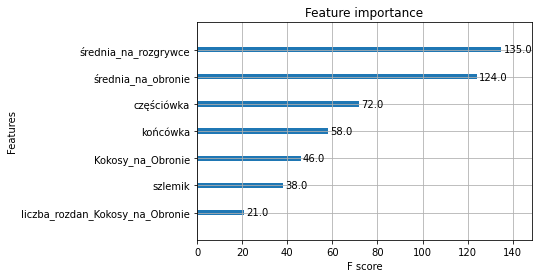

In [171]:
xgboost.plot_importance(model, max_num_features=7)
# Show the plot
plt.show()

In [172]:
y_pred = model.predict(X_test)
# Get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       649
           1       0.57      0.66      0.61       593
           2       0.51      0.13      0.21       138

    accuracy                           0.63      1380
   macro avg       0.60      0.50      0.51      1380
weighted avg       0.63      0.63      0.62      1380



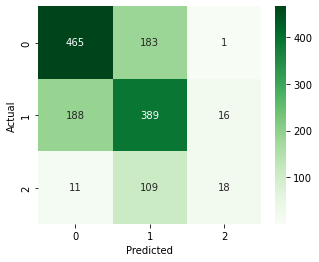

In [175]:
array = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(array, index=['0', '1','2'], columns=[
'0','1','2'])
plt.figure(figsize=(5, 4))
sn.heatmap(df, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [176]:
kfold = KFold(n_splits=3)
# Perform K-Fold Cross Validation
results = cross_val_score(model, X_test, y_test, cv=kfold)
# Print the average results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 60.07% (0.98%)


## Wnioski:
- tragiczny wynik dla kategorii 57+
- Niezły wynik dla <50
- Trzeba dołożyć WK może poziom ligi
- Sprawdzić co dla problemu: czy nagramy średnią (binarny problem)
- Hiperparametry

---------------------------
- co od strony statystyki?
* przedziały ufności, p_value- czy zawodnik wygra (na podstawie poprzednich wyników)